# Simple Linear Regression on Advertising Dataset

### Building a model to predict sales

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [2]:
advertising = pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
# checking no of rows and columns in data set
advertising.shape

(200, 4)

In [4]:
# we can check the missing rows and data types using info
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [5]:
# summary statistics of dataframe
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


 By looking at Sales statistics we can check that mean and median are almost same and the data is not skewed

## Visualising the data 

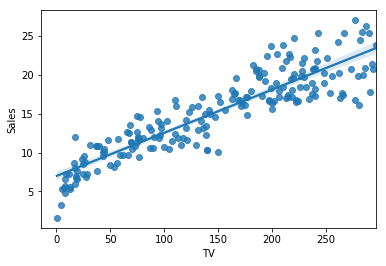

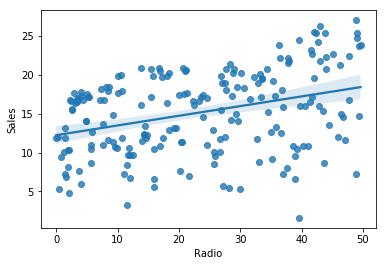

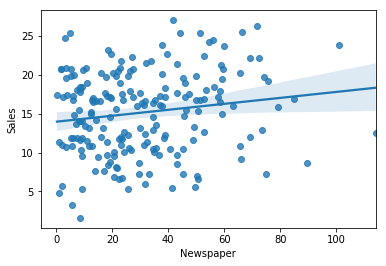

In [6]:
# Regression plot
col = ['TV','Radio','Newspaper']
for i in col:
    sns.regplot(x=i,y='Sales',data=advertising)
    plt.show()

The tv and sales plot is more smooth and appropriate. Its always good to plot and check the relation with the target variable

we can use pairplots to compare easily

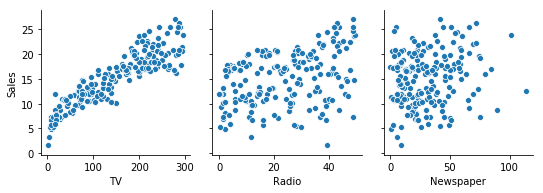

In [7]:
sns.pairplot(data=advertising,
            x_vars=col,
            y_vars='Sales')

## we can clearly compare all the features with the target variable
TV has high correlation coefficient as compared with the "Radio" and "Newspaper"

### we can also use heatmaps to check the correlations

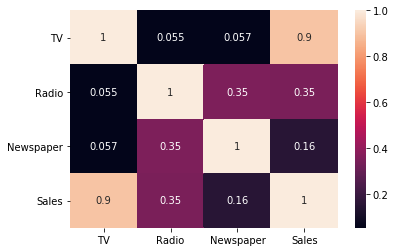

In [8]:
sns.heatmap(advertising.corr(),annot=True)
plt.show()

we can clearly see that TV has high correlation coefficient

In [9]:
# correlation matrix
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


### Performing Simple Linear Regression
y = c + m*X
The m values are called the model coefficients or model parameters

In [10]:
# create X and y
X = advertising['TV']
y = advertising['Sales']

In [11]:
# Train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state = 100)

In [12]:
print(X_train.shape,X_test.shape)

(140,) (60,)


In [13]:
# training the model

cons using stats model is
    1. By default the stats model doesnt include the constant
    2. we need to add constant explicitly
    3. Scikit learn doesnt give detailed summary of the model as statsmodels

In [14]:
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


 stats model fits a line passing through the origin by default. That is the reason why we are adding a constant

In [15]:
# fitting the model
lr = sm.OLS(y_train,X_train_sm) # creates a LinearRegression Object
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [16]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 14 Sep 2020   Prob (F-statistic):           1.52e-52
Time:                        16:22:43   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. coef and p-value
2. R-squared value should be high 
3. Prob(F-statistic) is low => the fit is not by chance
4. F-statistic tells you whether the overall model is significant or not. It is examined because many a time it happens that    even though all of our betas are significant, but overall model fit might happen just by chance
5. If Prob(F-statistic) is less than 0.05 we can say that overall model is significant

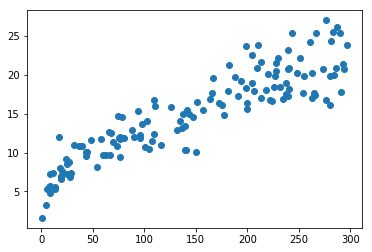

In [17]:
# How Model looks
plt.scatter(X_train,y_train)

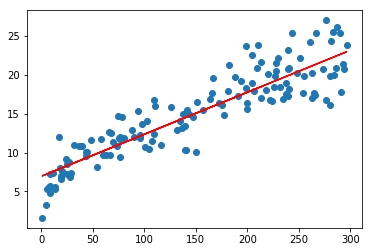

In [18]:
# Plotting the prdictions of the model
plt.scatter(X_train,y_train)
plt.plot(X_train,6.948 + 0.054*X_train,'r')

# Residual Analysis

In [19]:
# error = f(y_train,y_train_pred)
y_train_pred = lr_model.predict(X_train_sm)
res = y_train - y_train_pred

Text(0.5,1,'Residual plot')

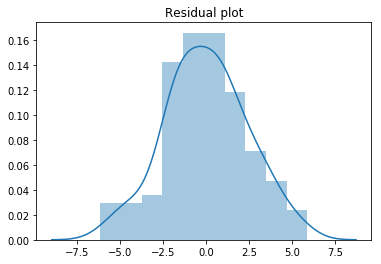

In [20]:
# Plot the residuals
plt.figure()
sns.distplot(res)
plt.title("Residual plot")

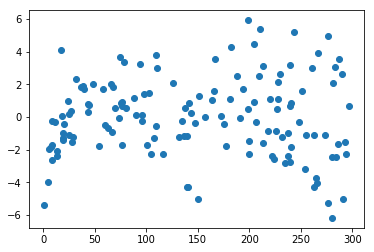

In [21]:
# look for patterns in residual (we should not be able to identify any patterns)
plt.scatter(X_train,res)

There is no pattern and hence not negotiating the assumption but the variance is not contsant

## Predictions and Evaluation on the test set

Always we should evaluate the model on the test set

In [22]:
# pred on test set
# y_test_pred = lr_model.predict(X_test) will throw an error since we didnt add the constant
y_test_pred = lr_model.predict(sm.add_constant(X_test))

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("Mean squared error",mean_squared_error(y_true = y_test,y_pred = y_test_pred))
print("r2_score on train data: ",r2_score(y_true = y_train,y_pred = y_train_pred))
print("r2_score on test data: ",r2_score(y_true = y_test,y_pred = y_test_pred))

Mean squared error 4.077556371826956
r2_score on train data:  0.8157933136480389
r2_score on test data:  0.7921031601245658


Recall that RMSE (Root Mean Squared Error) is a metric that tells you the deviation of the predicted values by a model
from the actual observed values. 
So, since it is a sort of error term, it is better to have a low RMSE.

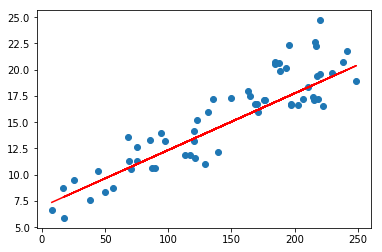

In [24]:
# Plotting the prdictions of the model on test set
plt.scatter(X_test,y_test)
plt.plot(X_test,6.948 + 0.054*X_test,'r')

## Linear Regression using sklearn

In [25]:
# steps in sklearn model building
from sklearn.linear_model import LinearRegression

# 1. create an object of linear regression
lm = LinearRegression()

#2. fit the model
X_train_lm = X_train.values.reshape(-1,1)
X_test_lm = X_test.values.reshape(-1,1)
# lm.fit(X_train,y_train) throws an error since scikit learn expects an array
lm.fit(X_train_lm,y_train)

# 3. see the params
print("coeff : ",lm.coef_)
print("intercept : ",lm.intercept_)

coeff :  [0.05454575]
intercept :  6.948683200001357


Transforimg to array. when we dont know number of rows we can give -1
    1. Using this => X_train.values.reshape(-1,1)

In [26]:
# make predictions
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [27]:
# Evaluate the model
print(r2_score(y_true = y_train,y_pred=y_train_pred))
print(r2_score(y_true = y_test,y_pred=y_test_pred))


0.8157933136480389
0.7921031601245662
